In [ ]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
%matplotlib inline
iris = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv')
iris.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [ ]:
X_train = iris[['Длина', 'Высота', 'Шерстист', 'Гавкает', 'Лазает по деревьям']]
y_train = iris[['Вид']]


In [ ]:
scores_data = pd.DataFrame()
max_depth_values = range(1, 101)

In [ ]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train , cv=3).mean()
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'mean_cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [ ]:
sortedscore = scores_data.sort_values(by=['mean_cross_val_score'])
sortedscore.head()

,max_depth,mean_cross_val_score
0,1,1.0
0,73,1.0
0,72,1.0
0,71,1.0
0,70,1.0


In [ ]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1)

In [ ]:
test_for_predict = pd.read_json('https://vk.com/doc96012121_500367829?hash=6fd797f9eabc629a43&dl=b120ac4862bb85a707')
test_for_predict.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,25,30.0,1,1,0
1,33,39.6,1,1,0
10,21,25.2,1,1,0
11,22,26.4,1,1,0
12,17,20.4,1,0,0


In [ ]:
X_test = test_for_predict[['Длина', 'Высота', 'Шерстист', 'Гавкает', 'Лазает по деревьям']]

In [ ]:
np.unique(clf.predict(X_test),return_counts=True)


(array(['котик', 'собачка'], dtype=object), array([56, 44]))

автоматический подбор параметров, 2.6

In [ ]:
from sklearn.model_selection import GridSearchCV #подбор комбинации параметров под результат - указанную метрику, по деф экьюраси
from sklearn import tree
clf1 = tree.DecisionTreeClassifier()

In [ ]:
parameters = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)}

In [ ]:
grid_search_cv_clf = GridSearchCV(clf1, parameters, cv=5)

In [ ]:
grid_search_cv_clf.fit(X_train, y_train) #для каждого значения параметра прогоняется обучение на кроссвалидации с фолдом равным пяти и выбирается лучшее значение параметров, почитать

In [ ]:
grid_search_cv_clf.best_params_

In [ ]:
best_clf = grid_search_cv_clf.best_estimator_

In [ ]:
best_clf.score(X_test, y_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
y_pred = best_clf.predict(X_test)

In [ ]:
precision_score(y_test, y_pred)

In [ ]:
recall_score(y_test, y_pred)

In [ ]:
y_predicted_prob = best_clf.predicted_proba_(X_test)#массив, в котором для каждого пассажира предсказано отнесение к + или - классу, а в y_pred - просто значения из 0 и 1, да и нет по отсечке 0,5, но это не всегда правильно

In [ ]:
pd.Series(y_predicted_prob[:, 1]).hist()#распределение предсказаний для ДФ. видим что есть на 0,5, можем захотеть отсечь их

In [ ]:
y_pred = np.where(predicted_prob[:, 1] > 0.8, 1, 0)#оставляем только тех у кого вероятность выжить больше 0,8

In [ ]:
precision_score(y_test, y_pred)#станет больше, а риколл меньше

как найти оптимальный баланс - ROC-кривая. по ней идем сверху вниз: вверху - самый маленький порог, когда ТП высокий и ФП высокий. показатель (вроде) - площадь под рок-кривой

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
%matplotlib inline
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

random forest без диагарммы важности фичей, но с подбром параметров деревьев

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
%matplotlib inline


In [ ]:
df = pd.read_csv('https://vk.com/doc96012121_500880187?hash=8dd7450cf4fab74e8d&dl=67a22e96d138d2c0c5')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
X_train = df.drop('target', axis=1)
y_train = df[['target']]

In [ ]:
np.random.seed(0)
rf = RandomForestClassifier(10, max_depth=5)

In [ ]:
parameters = {'n_esimators': [10, 20, 30], 'max_depth': [2, 5, 7, 10]}

In [ ]:
grid_search_cv_clf = GridSearchCV(clf_rf, parameters, cv=5)

In [ ]:
grid_search_cv_clf.fit(X_train, y_train)

In [ ]:
grid_search_cv_clf.best_params_
best_clf = grid_search_cv_clf.best_estimator_
feature_importances = best_clf.feature_importances_
feature_importances_df = pd.DataFrame({'features':list(X_train),
                                       'feature_importances': feature_importances})
feature_importances_df.sort_values('feature_importances', ascending=False)


confusion matrix сравнений предсказанных значений с правильными и хитмэп на основе матрицы

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [ ]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/training_mush.csv')
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,1,2,2,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,0,1,3,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,1,1,1,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,0,1,2,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,1,2,2,3,6,0,2,1,4,2,5,0,0


In [ ]:
X_train = df.drop('class', axis=1)
y_train = df[['class']]

In [ ]:
 rf = RandomForestClassifier(max_depth = 9, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 10)

In [ ]:
X_train = df.drop('class', axis=1)
y_train = df[['class']]

In [ ]:
rf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
df_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/testing_mush.csv')
X_test = df_test

In [ ]:
can_eat = rf.predict(X_test)

In [ ]:
np.unique(rf.predict(X_test),return_counts=True)

(array([0, 1]), array([1055,  976]))

In [ ]:
answers = pd.read_csv('https://vk.com/doc96012121_501031697?hash=20f03b65daff4f9afd&dl=5488f65085e56e181b')
answers.head()

,class
0,0
1,0
2,1
3,1
4,1


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
conf_m = confusion_matrix(answers, can_eat)

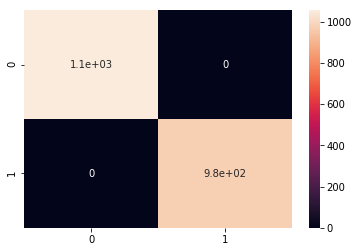

In [ ]:
import seaborn as sns

sns.heatmap(conf_m, annot=True)